In [6]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Python_ML_Fin/Part 2. Financial Analysis and Portfolio Optimization/stock.csv'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [13]:
file_path = r'/content/drive/My Drive/Python_ML_Fin/Part 2. Financial Analysis in Python/stock.csv'
stocks_df = pd.read_csv(file_path)
stocks_df.head()



,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


  ###  Project Summary: Stock CSV Import and Setup

We began by mounting Google Drive to access our data files in Colab. Our goal was to load the `stock.csv` file located in the "Python_ML_Fin" directory.

Initially, we encountered a FileNotFoundError due to an incorrect folder name in the file path. After inspecting the directory manually via Google Drive, we identified the correct folder as “Part 2. Financial Analysis in Python,” not the previously assumed name.

Once the correct path was applied using a raw string to handle spaces, the CSV file loaded successfully into a pandas DataFrame.

We also imported several key libraries for data analysis and visualization, including pandas, matplotlib, seaborn, numpy, scipy, and plotly.

At this point, the data is successfully loaded and ready for exploration, visualization, or algorithmic trading strategy development.


In [14]:
print('Total Number of Stocks : {}'.format(len(stocks_df.columns[1:])))

print("Stock we are analyzing:")
for i in stocks_df.columns[1:]:
  print(i)

Total Number of Stocks : 9
Stock we are analyzing:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


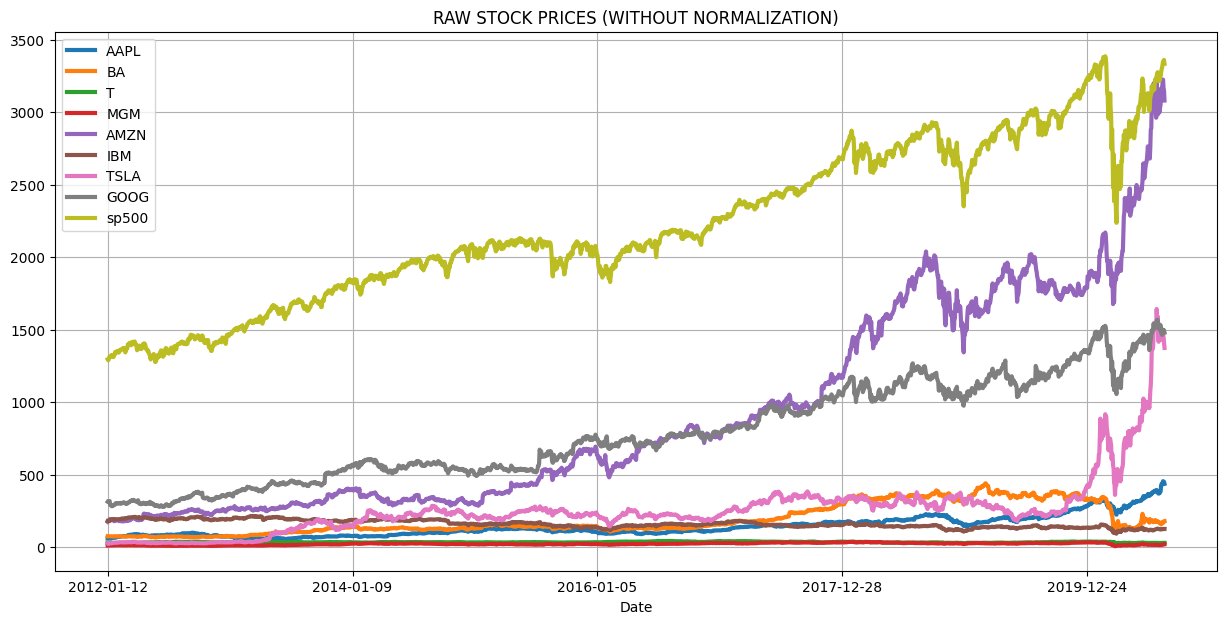

In [16]:
#Check for null
# then get dataframe info
 #define a function tro plat a datframe

stocks_df.isnull().sum()
stocks_df.info()

def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

Normalization transforms different stock price series so they start from a common baseline, typically 1 or 100, to compare their relative growth over time.

Raw prices can't be compared directly (e.g., AMZN might be \$3,000 and AAPL \$150).

But normalization lets you say:

“If I had invested $1 in each stock at the same time, how would each investment have grown?”

***We have plotted the price of stocks overtime.. now we want to Normalize that data***



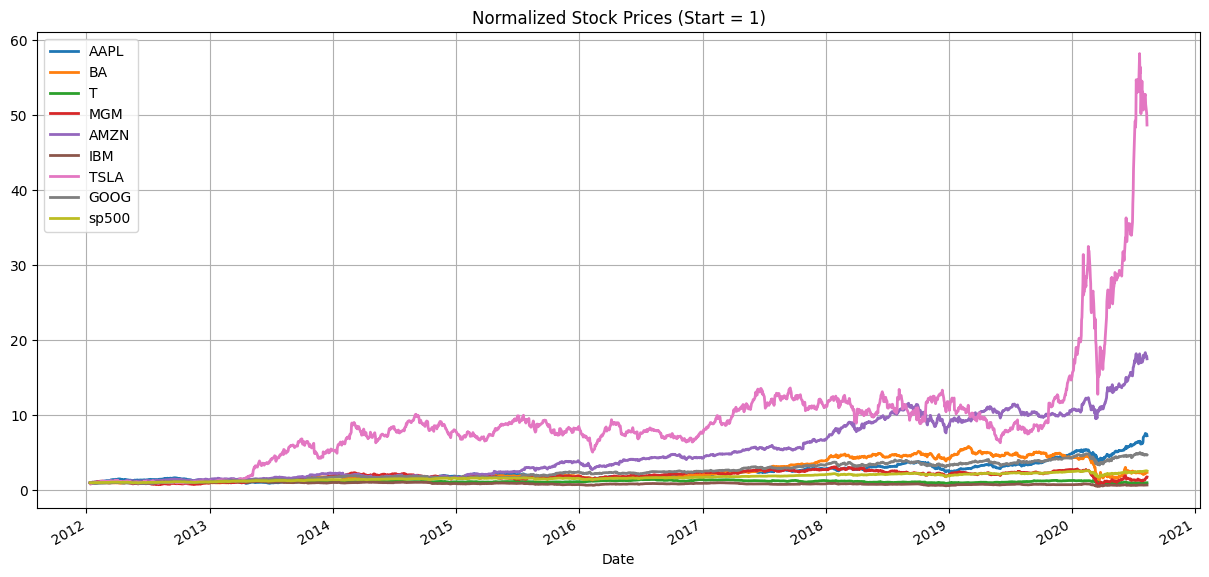

In [17]:
# Set 'Date' as the index if not already
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df.set_index('Date', inplace=True)

# Normalize: divide each column by its first value
normalized_df = stocks_df / stocks_df.iloc[0]

# Optional: reset index if needed later
# normalized_df = normalized_df.reset_index()
def show_plot(df, fig_title):
    df.plot(figsize=(15,7), linewidth=2, title=fig_title)
    plt.grid()
    plt.show()

show_plot(normalized_df, 'Normalized Stock Prices (Start = 1)')


In [18]:
import plotly.graph_objects as go

fig = go.Figure()

for column in normalized_df.columns:
    fig.add_trace(go.Scatter(
        x=normalized_df.index,
        y=normalized_df[column],
        mode='lines',
        name=column
    ))

fig.update_layout(
    title='Normalized Stock Prices (Start = 1)',
    xaxis_title='Date',
    yaxis_title='Normalized Price',
    template='plotly_white',
    hovermode='x unified',
    width=1000,
    height=600
)

fig.show()


After the Normalized data is charted on an interactive chart, you can see over the time peroid of 2013 to 2020, TSLA is by far your best investment, in Jan 2020 you would have \$ 19.75 for every \$1. Your only loss would be IBM, with \$.76 for each \$1 invested.

In [22]:
# ✅ Calculate Daily Returns for All Stocks (Optimized Version)

# Make sure Date is the index (if it's not already)
stocks_df.index = pd.to_datetime(stocks_df.index)

# Define function to calculate daily percentage returns
def daily_return(df):
    df_daily_return = df.copy()

    # Apply pct_change to each column to calculate daily returns
    for col in df.columns:
        df_daily_return[col] = df[col].pct_change() * 100

    # Replace NaN in first row with 0
    df_daily_return.fillna(0, inplace=True)

    return df_daily_return

# Apply the function
stocks_daily_return = daily_return(stocks_df)

# Preview the daily return DataFrame
stocks_daily_return.head()






,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866


###  Daily Return Calculation Summary

Above, we first calculated the daily percentage return for a single security — the S&P 500 — by measuring the percentage change between each day and the previous day.

Then, we defined a reusable function to calculate daily returns for all stocks in the dataset. This function loops through each column (representing a stock), computes the daily percentage change, and sets the first day’s return to zero (since there's no prior data to compare to).

The result is a new DataFrame containing the daily return for each stock in percentage terms, which helps us analyze volatility, momentum, and risk-adjusted performance across time.


<Axes: >

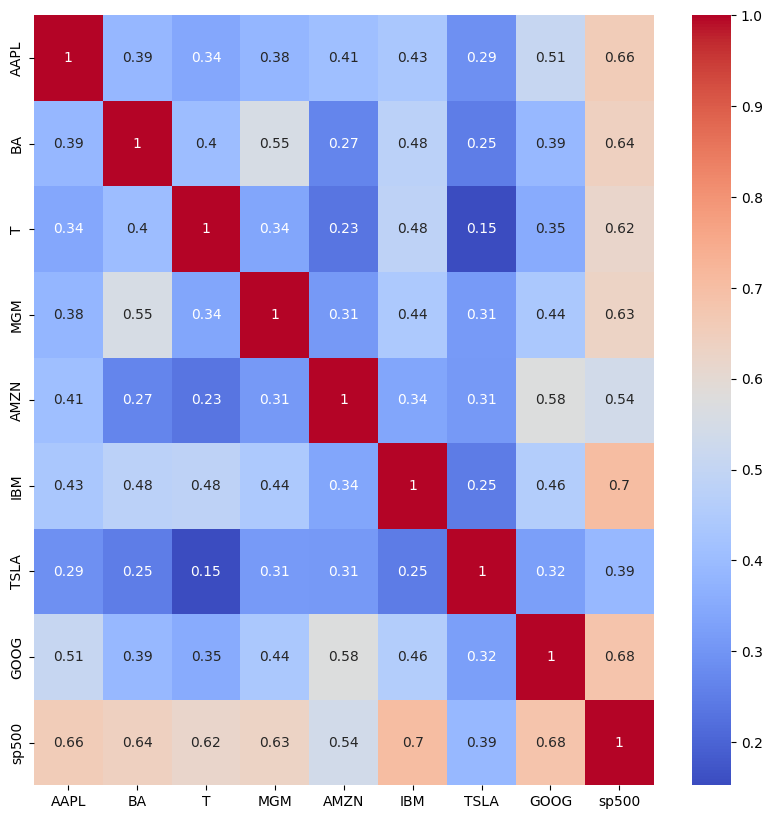

In [24]:
# Daily Return Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

cm = stocks_daily_return.corr()

plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap='coolwarm', ax=ax)


You're looking at a correlation heatmap — it shows how closely the daily returns of each stock move in relation to one another.Each cell shows the correlation coefficient (ranging from -1 to +1) between two stocks.

Diagonal values are all 1.00 — a stock is always perfectly correlated with itself.

The closer to 1, the more both stocks move together.

The closer to -1, the more both stocks move oppositely.

Values near 0 mean no relationship.

 It was interesting to see that AMZN and TSLA did not have strong correlations with the SP500
  



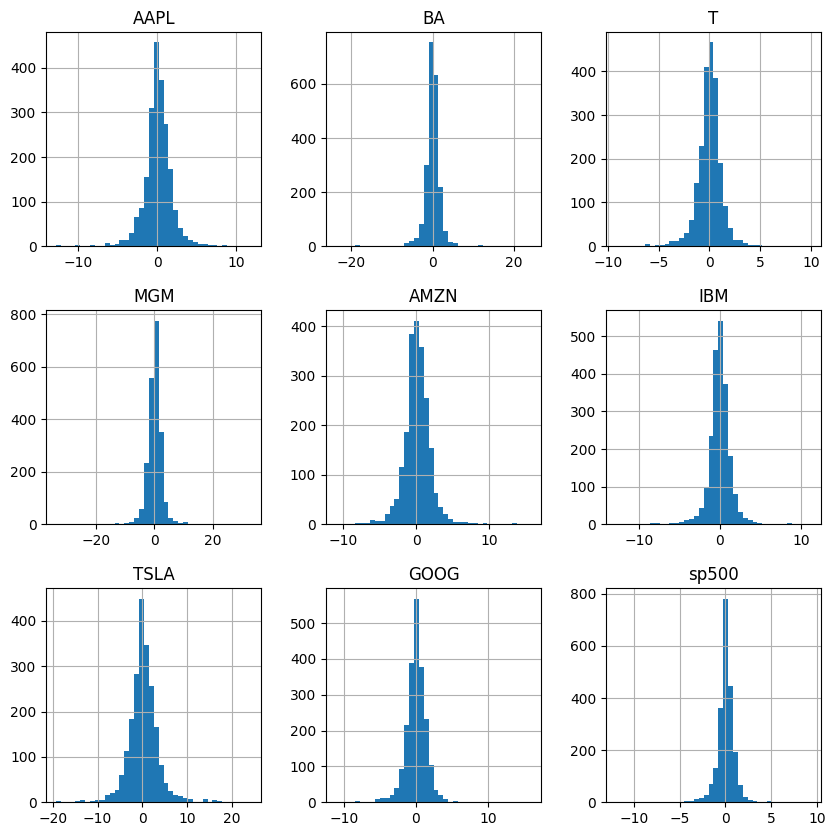

In [25]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [27]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()



data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [28]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()